## ML Part 2-3. Logistic Regression

## 1.로지스틱 회귀 (Logistic Regression)
- 지도학습(Supervised)
- 분류(classfication) 알고리즘
- 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측
- 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류함
- **이진 분류 알고리즘(Binary classfication)** : 분류 레이블 0 or 1
- 0 ~ 1 범위를 예측 결과로 갖는 모델 필요하여 가설 결과에 Sigmoid 함수 적용
- 단순하면서 강력한 알고리즘(빠른 속도)
- 예) 스팸 메일 분류기 : 확률이 0.5 이상일 때 스팸으로 분류
- ```sklearn.linear_model.LogisticRegression()```

### 1-01. 로지스틱 회귀의 필요성


[0.12857143] -0.3999999999999999


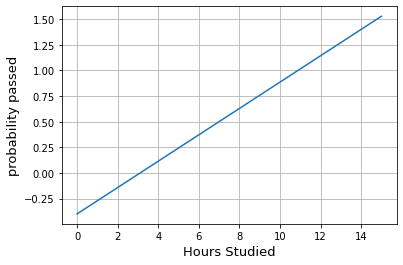

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = np.array([2, 4, 6, 8, 10, 12])  # 학습시간
y_train = np.array([0, 0, 0, 1, 1, 1])    # 합격여부
X_test  = np.array([0, 1, 3, 5, 9, 15])   # 예측해 볼 데이터                          

lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train)
print(lr.coef_, lr.intercept_)
plt.plot(X_test, lr.predict(X_test.reshape(-1,1)))
plt.xlabel("Hours Studied", fontsize=13)
plt.ylabel("probability passed", fontsize=13)
plt.grid(True)
plt.show()

In [ ]:
# 위에서 3 시간 이하 학습하면 합격할 확률이 음수로 나오고 11시간 이상 학습하면 합격 확률이 1이상이다
- 이것은 선형회귀에서는 각 속성의 값에 계수(coefficient)에 각 곱하고 절편(intercept)를 더해서 예측 값을 구하기 때문이다
- 예측 값이 음의 무한대에서 양의 무한대 까지이다

[[0.95789414]] [-6.70525572]


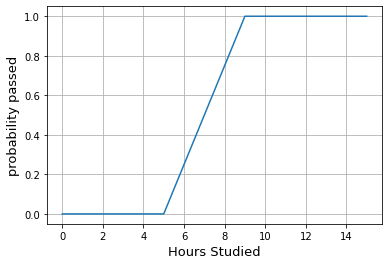

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_train = np.array([2, 4, 6, 8, 10, 12])  # 학습시간
y_train = np.array([0, 0, 0, 1, 1, 1])     # 합격여부
X_test = np.array([0, 1, 3, 5, 9, 15])    # 예측해볼 데이터                          

lr = LogisticRegression()  # 로지스틱 Regression으로 변경

lr.fit(X_train.reshape(-1,1), y_train)
print(lr.coef_, lr.intercept_)
plt.plot(X_test, lr.predict(X_test.reshape(-1,1)))
plt.xlabel("Hours Studied", fontsize=13)
plt.ylabel("probability passed", fontsize=13)
plt.grid(True)
plt.show()

- 로지스틱 회귀에서 데이터가 특정 범주에 속할 확률을 예측하는 방법
1. 모든 Feature의 coefficient와 intercept를 0으로 초기화
2. 각 Feature의 값(value)에 coefficient를 곱해서 log-odds를 구함
3. log-odds를 sigmoid 함수에 넣어 [0, 1] 범위의 확률 구함

### 1-02. log-odds
- odds(승산) : 사건이 발생할 확률을 발생하지 않을 확률로 나눈 값 (sample이 충분치 않으면 한쪽으로 치우치는 분포를 보임)
- log-odds : odds의 값에 log를 취한 것 (sample의 작거나 중간정도일 경우에도,  log_odds 를 사용하면 치우치는 분포 문제를 피할 수 있음)
- 예) 합격할 확률이 0.7 이라면 
   - odds of pass : 0.7 / 0.3 =  2.33...
   - log odds of pass : log(2.33...) = 0.847

 > 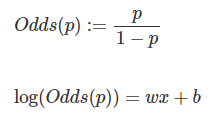


### 1-03. sigmoid 함수
- S자 모양의 함수
> 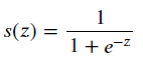
- z값을 0과 1 사이의 값으로 바꾸는 함수
- logistic regression에서는 log_odds를 z값으로 사용함
> 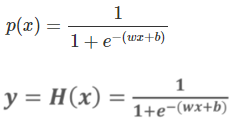

In [ ]:
import numpy as np
def sigmoid(z):
    return  1/(1+np.exp(-z))

prob = 0.7
odds = prob/(1-prob)
log_odds = np.log(odds)
r = sigmoid(log_odds)   
print(odds, log_odds, r) 

2.333333333333333 0.8472978603872034 0.7


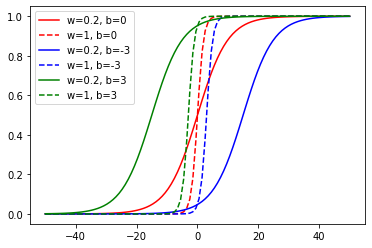

In [ ]:
# sigmoid 함수를 그려보자
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return  1/(1+np.exp(-z))

def drawSigmoid(w=0.5, b=0, style='-', label=None, x=None):
    if x is None :
        x = np.linspace(-50, 50, 100).reshape(-1,1)
    else:
        x = np.linspace(np.min(x), np.max(x), 100).reshape(-1,1)
    
    y = sigmoid(x * w + b)
    plt.plot(x, y, style, label=label)
    
drawSigmoid(0.2,  0, 'r', label="w=0.2, b=0")
drawSigmoid(  1,  0, 'r--', label='w=1, b=0')

drawSigmoid(0.2, -3, 'b', label='w=0.2, b=-3')
drawSigmoid(  1, -3, 'b--', label='w=1, b=-3')

drawSigmoid(0.2,  3, 'g', label='w=0.2, b=3')
drawSigmoid(  1,  3, 'g--', label='w=1, b=3')
plt.legend()

## 2.Logistic Regression - 랜덤수 분류

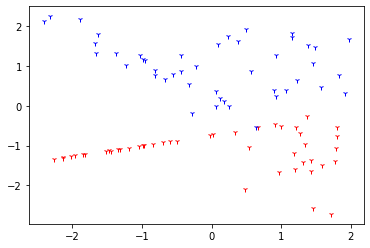

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=90, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0)

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

accuracy:0.989


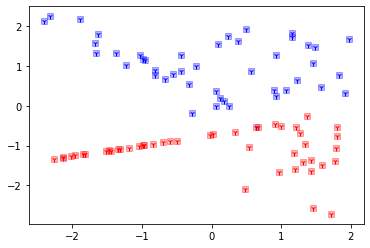

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X, y)
predict = lr_clf.predict(X)

print(f'accuracy:{accuracy_score(y, predict):.3f}')

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

plt.plot(X[predict==0][:,0],X[predict==0][:,1], 'rs', alpha=0.3)
plt.plot(X[predict==1][:,0],X[predict==1][:,1], 'bs', alpha=0.3)

In [ ]:
import numpy as np, cv2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

np.random.seed(0)
n=100
X1 = np.random.randint(0,10, (n))
y = np.zeros(n)
y[X1 == 5] = 1

X2 = np.random.randint(0,10, (n))
pred = np.zeros(n)
pred[X2 == 5] = 1

accuracy = np.sum([y==pred]) /n

print(f'accuracy: {accuracy*100:.2f}%')
print(f'accuracy: {accuracy_score(y, pred)*100:.2f}%')
print(confusion_matrix(y, pred))

accuracy: 85.00%
accuracy: 85.00%
[[84  5]
 [10  1]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

accuracy = accuracy_score(y, pred)
precision = precision_score(y, pred)
recall = recall_score(y, pred)

print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')

In [ ]:
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
y =    [0,0,1,1,0,0,1,1]
pred1 = [0,0,0,1,1,0,1,1]
pred2 = [0,0,1,0,0,0,0,0]
pred3 = [1,1,1,1,1,1,1,1]
for pred in [pred1, pred2, pred3]:
    print(confusion_matrix(y, pred))
    accuracy = accuracy_score(y, pred)
    precision = precision_score(y, pred)
    recall = recall_score(y, pred1)
    f1 = f1_score(y, pred)
    print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}, f1: {f1}')

## 3.분류 모델 평가 지표
- 시각화 방법 : https://bcho.tistory.com/1206

### 3-01. Confusion Matrix (오분류표)


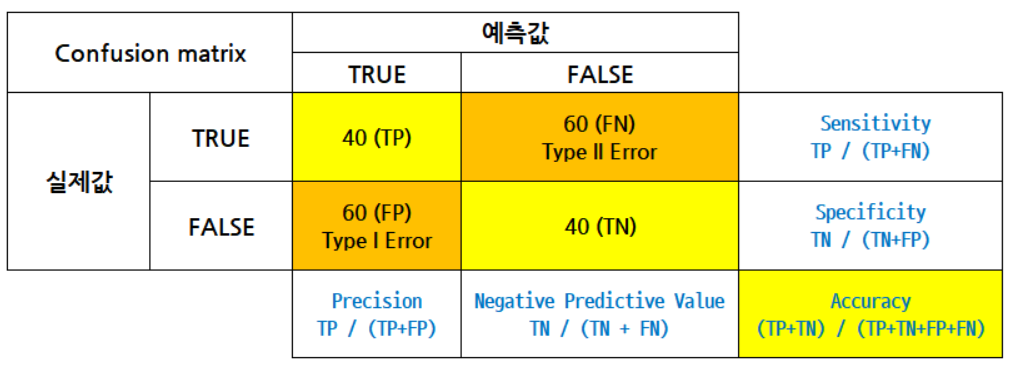

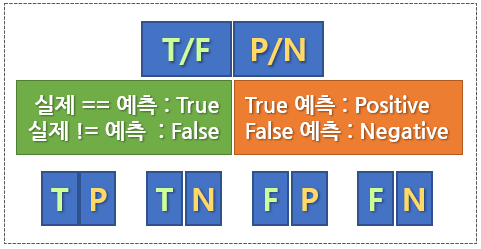

### 3-02. 오분류표를 활용한 평가지표

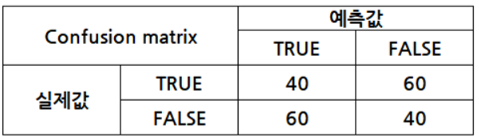

- **Accuracy** : 전체 예측에서 '옳은 예측'의 비율
   - **(TP + TN) / (TP + TN + FP + FN)**
- **Error Rate** : 전체 예측에서 '틀린 예측'의 비율
   - **(FP + FN) / (TP + TN + FP + FN)**
- **Precision(정확도)** : **예측이 True**인 것에 대해 **실제도 True**인 지표     
   - **TP / (TP + FP)**
   - **Type I Error** : 실제 False인데 True로 예측된 것
      - 스팸메일이 아닌데 스팸으로 처리 된 것
- **Recall(재현률), Sensitivity** : **실제가 True**인 것에 대해 **예측도 True**인 지표
   - **TP / (TP + FN)**   
   - **Type II Error** : 실제 True인데 False로 예측된 것
      - 암환자인데 암환자가 아닌 것으로 처리 된 것
- Precision, Recall은 균형을 이루는 것이 좋음

- **F1 score** : Precision, Recall의 균형을 나타내는 수치
  - 2 * (Precision* Recall) / (Precision + Recall)
- Model A = precision : 0.5, recall : 0.5
  - F1 score = 2 * (0.5 * 0.5) / (0.5 + 0.5) = 0.5  
- Model B = precision : 0.9, recall : 0.1
  - F1 score = 2 * (0.9 * 0.1) / (0.9 + 0.1) = 0.1
  > Model A > Model B



In [ ]:
n = 200
TP, FN = 40, 60
FP, TN = 60, 40

In [ ]:
#Accuracy  = (TP + TN) / (TP + TN + FP + FN)
Accuracy = (TP + TN) / n
ErrorRate = (FP + FN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall    = TP / (TP + FN)
print(f'Accuracy  = {Accuracy*100}%, ErrorRate = {ErrorRate*100}%')
print(f'Precision = {Precision*100}%, Recall = {Recall*100}%')

Accuracy  = 40.0%, ErrorRate = 60.0%
Precision = 40.0%, Recall = 40.0%


### 3-03. sklearn.matrics API 사용
- ```sklearn.metrics.confusion_matrix(test_y, pred)```
   - ``` return : Ci,j (i : actual, j : predicted)```
> 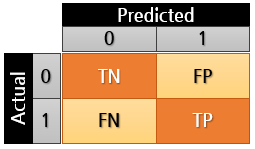   
- ```sklearn.metrics.accuracy_score(test_y, pred)```
- ```sklearn.metrics.precision_score(test_y, pred)```
- ```sklearn.metrics.recall_score(test_y, pred)```
- ```sklearn.metrics.f1_score(test_y, pred)```
   - f1_score의 average parameter에 "micro", "macro", "weighted"를 사용해 class별 sample의 수를 고려할지, 안할지, 가중치를 둘지를 정할 수 있음

In [ ]:
import numpy as np, cv2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

np.random.seed(0)
n = 100
X1 = np.random.randint(0, 10, (n,))
y = np.zeros(n)
y[X1 == 5] = 1

X2 = np.random.randint(0, 10, (n,))
pred = np.zeros(n)
pred[X2 == 5] = 1

display(y[:15], pred[:15])

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
accuracy1 = np.sum([y==pred]) / n
accuracy2 = accuracy_score(y, pred)
print(f'accuracy1 = {accuracy1*100:.2f}%')
print(f'accuracy2 = {accuracy2*100:.2f}%')

accuracy1 = 85.00%
accuracy2 = 85.00%


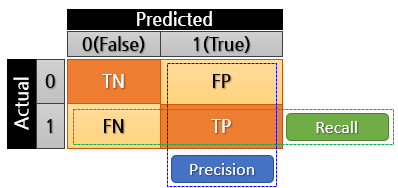

In [ ]:
print(confusion_matrix(y, pred))

[[84  5]
 [10  1]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy  = accuracy_score(y, pred)
precision = precision_score(y, pred)
recall    = recall_score(y, pred)
f1_score  = f1_score(y, pred, average="micro")
print(f'accuracy : {accuracy*100:5.2f}%')
print(f'precision: {precision*100:5.2f}%')
print(f'recall   : {recall*100:5.2f}%')
print(f'f1 score : {f1_score:5.2f}')  

accuracy : 85.00%
precision: 16.67%
recall   :  9.09%
f1 score :  0.85


### 3-04. 평가 지표 출력 연습
- 다음에 대해 confusion_matrix, accuracy, precision, recall, f1-score 를 출력해 보도록 한다
- y : 실제 값
- pred1, pred2, pred3 : 예측 값 (서로 다른 모델)

In [ ]:
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
y     = [0,0,1,1,0,0,1,1]
pred1 = [0,0,0,1,1,0,1,1]
pred2 = [0,0,1,0,0,0,0,0]
pred3 = [1,1,1,1,1,1,1,1]

for pred in [pred1, pred2, pred3]:
    print(confusion_matrix(y, pred))
    accuracy  = accuracy_score(y, pred)
    precision = precision_score(y, pred)
    recall    = recall_score(y, pred1)
    f1        = f1_score(y, pred)
    print(f'accuracy:{accuracy:.2f}, precision:{precision:.2f}, recall:{recall:.2f}, f1: {f1:.2f}')
    print('-' * 55)

[[3 1]
 [1 3]]
accuracy:0.75, precision:0.75, recall:0.75, f1: 0.75
-------------------------------------------------------
[[4 0]
 [3 1]]
accuracy:0.62, precision:1.00, recall:0.75, f1: 0.40
-------------------------------------------------------
[[0 4]
 [0 4]]
accuracy:0.50, precision:0.50, recall:0.75, f1: 0.67
-------------------------------------------------------


### 3-05. 그외 평가지표
- Specificity(특이도) : 실제 False인데 예측이 False로 된 것의 비율
   - TN / (TN + FP)
- FP Rate : 실제 False인데 예측이 True로 된 것의 비율
  - FP / (TN + FP), 1 - Specificity   

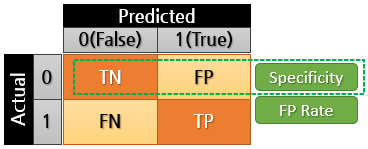

In [ ]:
# 식을 사용하여 Specificity와 FP Rate를 구해본다
from sklearn.metrics import confusion_matrix
y     = [0,0,1,1,0,0,1,1]
pred1 = [0,0,0,1,1,0,1,1]
pred2 = [0,0,1,0,0,0,0,0]
pred3 = [1,1,1,1,1,1,1,1]

for pred in [pred1, pred2, pred3]:
    m = confusion_matrix(y, pred)
    TN, FP = m[0]
    specificity = TN/(TN+FP)
    FPRate = 1 - specificity
    print(m)
    print(f'specificity:{specificity:.2f}, FPRate:{FPRate:.2f}')
    print('-' * 55)

[[3 1]
 [1 3]]
specificity:0.75, FPRate:0.25
-------------------------------------------------------
[[4 0]
 [3 1]]
specificity:1.00, FPRate:0.00
-------------------------------------------------------
[[0 4]
 [0 4]]
specificity:0.00, FPRate:1.00
-------------------------------------------------------


[참고]
- ROC(Receiver Operating Characteristics) Curve
  - 가로축을 1-specificity, 세로축을 recall로 하여 시각한 그래프
  - sklearn.metrics.roc_curve 사용
  - area가 넓을 수록 좋은 모델임
  - ```https://en.wikipedia.org/wiki/Receiver_operating_characteristic```

  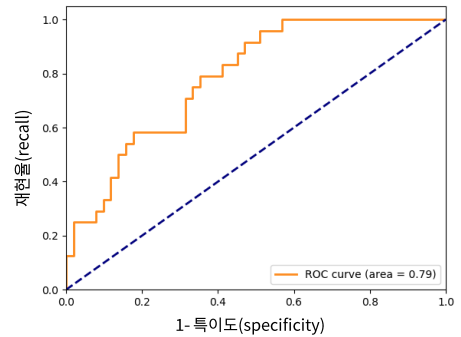

## 4.Logistic Regression - 위스콘신 유방암

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, cancer.target, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print(f'train accuracy : {lr_clf.score(X_train, y_train)*100:.2f}%')
print(f'test accuracy  : {accuracy_score(y_test, pred)*100:.2f}%')

train accuracy : 99.06%
test accuracy  : 96.50%


In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
print(cancer['DESCR'])

## 5.교차 검증(Cross-Validation)
- 머신러닝 모델의 예측 성능 검증을 위한 통계적인 방법
- 데이터를 Training과 Validation용으로 나누어 사용하는 것
- 일반적으로 Training을 70~80%, 나머지를 Validation에 사용함
- Cross-Validation의 종류
   - Hold-out : 전체 데이터를 Training과 Testing 용으로 나누어 사용함 (절대 섞이지 않음)
   - k-fold cross-validation

### 5-01. k-fold cross-validation
- 데이터가 충분치 않을 경우 Hold-out으로 나누면 여전히 많은 양의 분산 발생
- 이에 대한 한 가지 해결책으로 k-fold cross-validation을 사용할 수 있음
- Overfitting 을 해결하기 위한 방법으로도 사용됨
- 전체 프로세스를 k번 수행하고 모든 수행에서 나온 정확도의 평균을 구하는 방법
- K-Fold Cross Validation 방법
  - 전체 데이터를 shuffle
  - shuffle된 데이터를 k개의 데이터로 등분 
  - 분리된 k개의 subset 중 k-1 개를 훈련 데이터로 사용, 남은 1개는 테스트 데이터로 사용
  - 분리된 k개 만큼 모델 훈련 및 테스트 진행
  - 성능의 평균 값이 최종 값
  - **불균형 데이터에 적합하지 않음**
- Cross Validation : https://towardsdatascience.com/understanding-8-types-of-cross-validation-80c935a4976d


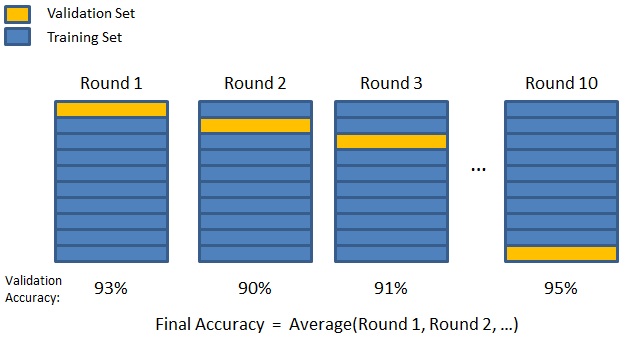

- 출처 : ```https://chrisjmccormick.wordpress.com/2013/07/31/k-fold-cross-validation-with-matlab-code/```

### 5-02. sklearn API - cross-validation
- sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, ...)
     - estimator : fit을 구현한 estimator 객체
     - X : 학습에 사용할 데이터
     - y : Target variable
     - cv : cross-validation splitting strategy를 결정, 정수는 simple k-fold cross-validation
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
!pip install mglearn

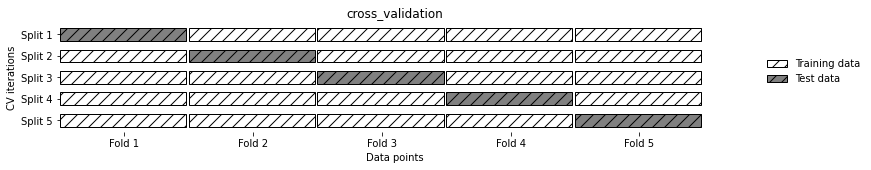

In [ ]:
import mglearn
mglearn.plots.plot_cross_validation()

In [ ]:
## k=5 일때 cross validataion은 
- 데이터를 [ 5 ]개의 부분 집합으로 분할한 뒤, 
- 각 분할마다 [ 1 ]개의 fold를 테스트용으로 사용하고 나머지 [ 4 ]개의 fold는 훈련용으로 사용함

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

In [ ]:
iris   = load_iris()
logreg = LogisticRegression()

In [ ]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"교차 검증 점수 : {[ f'{score:.2f}' for score in scores ]}")
print(f"교차 검증 평균 : {scores.mean():.3f}")

교차 검증 점수 : ['0.97', '1.00', '0.93', '0.97', '1.00']
교차 검증 평균 : 0.973


### 5-03. Stratified k-fold cross-validation
- 데이터가 몰려 있을 경우 Simple k-fold cross validation을 사용하면 성능 평가가 잘 되지 않을 수 있음
- Stratified k-fold cross-validation에서는 **k개 그룹(fold)에 동일한 수의 target 클래스가 분포**된다
- 데이터 집합의 균형이 맞지 않을 때 특정 클래스가 검증 또는 학습 단계에서 제외되지 않도록 보장한다
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.htm

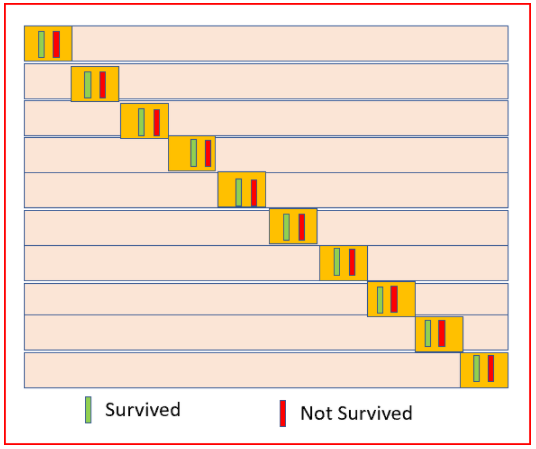

- 출처 : ```https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e```

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=skf)   # cv=skf
print(f"교차 검증 점수 : {[ f'{score:.2f}' for score in scores ]}")
print(f"교차 검증 평균 : {scores.mean():.3f}")

교차 검증 점수 : ['1.00', '0.93', '0.93', '1.00', '1.00', '0.93', '0.93', '1.00', '0.93', '0.93']
교차 검증 평균 : 0.960


In [ ]:
Stratified k-fold cross-validataion

## 6.SVM(Support Vector Machine)
- 높은 인식 성능을 보여주는 지도 학습의 대표 알고리즘
- 분류(classification) 알고리즘
- 선을 구성하는 hyperparameter를 조정해서 요소들을 구분하는 선을 찾고, 이를 기반으로 패턴을 인식하는 방법
- Margin을 최대가 되도록하는 알고리즘

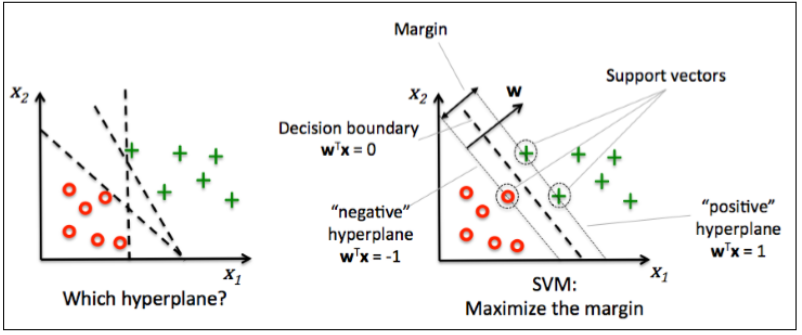

- sklearn 의 SVM에는 C 파라메터가 있음
- C 값에 따라 경계선이 달라짐
  - overfitting / underfitting이 될 수 있음
  - [0.01, 0.1, 1.0, 10.0] 값을 많이 사용함

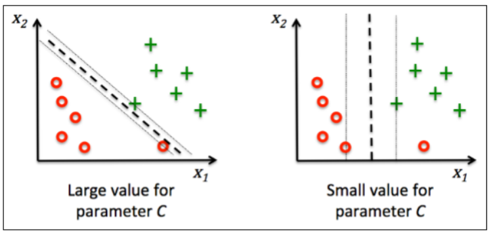

### 6-01. SVC - 랜덤수 분류

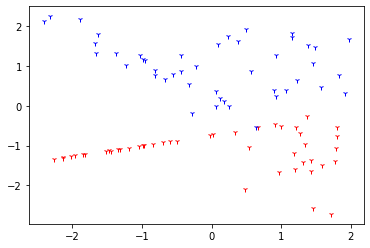

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=90, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0)

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

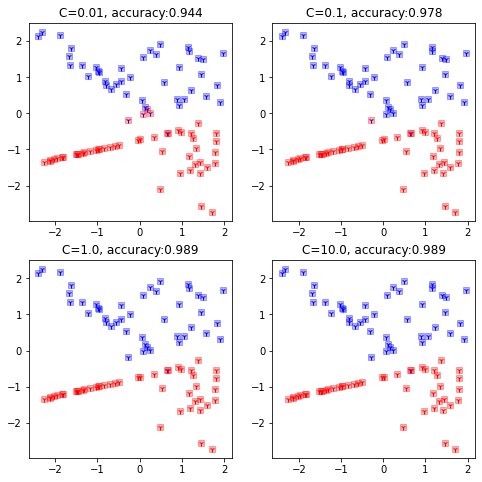

In [ ]:
from sklearn.svm import SVC   # C -> Classfication 을 의미함
from sklearn.metrics import accuracy_score

# SVM
c_list = [0.01, 0.1, 1.0, 10.0]
predict_list = []
for c in  c_list:
    svm = SVC(kernel='linear', C=c, random_state=0)   # C를 변경해 가면서 작성
    svm.fit(X, y)
    predict = svm.predict(X)
    predict_list.append( [predict, accuracy_score(y, predict)] )
    #print(f'accuracy:{accuracy_score(y, predict)}')

plt.figure(figsize=(8, 8))
for n, p in enumerate(predict_list, start=1):
    predict, accuracy = p
    plt.subplot(2, 2, n)
    plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
    plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')
    plt.plot(X[predict==0][:,0],X[predict==0][:,1], 'rs', alpha=0.3)
    plt.plot(X[predict==1][:,0],X[predict==1][:,1], 'bs', alpha=0.3)
    plt.title(f'C={c_list[n-1]}, accuracy:{accuracy_score(y, predict):.3f}')


### 6-02. SVC - 3D

0.985


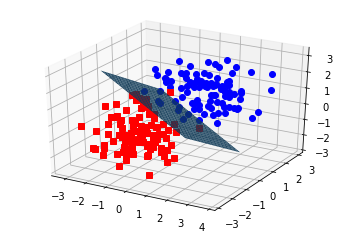

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200,3))
X[:n_samples//2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples//2)
X[n_samples//2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples//2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[n_samples//2:] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)
predict = svc.predict(X)
print(accuracy_score(Y, predict))
# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()